## For better apporximation please see LAB10_Q2_better.ipynb

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

from utils import *

In [43]:
# Test the function with your input file
n, adj_matrix = read_test_case2_from_txt("./Testcase_Q2.txt")
print("Number of vertices:", n)
print("Adjacency Matrix:")
for row in adj_matrix:
    print(row)


Number of vertices: 50
Adjacency Matrix:
[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1

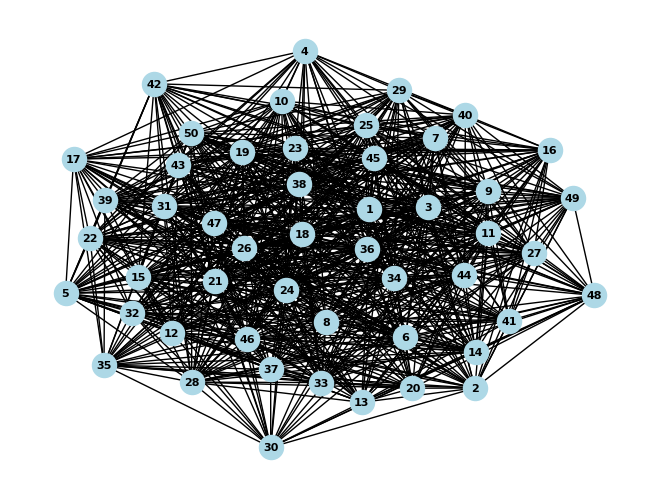

In [44]:
def visualize_graph(adj_matrix):
    G = nx.Graph()

    # Add edges to the graph
    for i in range(len(adj_matrix)):
        for j in range(i + 1, len(adj_matrix[i])):
            if adj_matrix[i][j] == 1:
                G.add_edge(i + 1, j + 1)  # Adding 1 to make the vertices 1-indexed

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', font_color='black', font_size=8)
    plt.show()

visualize_graph(adj_matrix)


In [45]:
def min_vertex_cover_approximation(adj_matrix):
    n = len(adj_matrix)
    vertex_cover = set()
    edges = set()

    # Create a set of edges from the adjacency matrix
    for i in range(n):
        for j in range(i + 1, n):
            if adj_matrix[i][j] == 1:
                edges.add((i + 1, j + 1))  # Adding 1 to make the vertices 1-indexed

    # Sort edges based on the degree (number of connections) of each vertex
    sorted_edges = sorted(edges, key=lambda x: adj_matrix[x[0] - 1].count(1) + adj_matrix[x[1] - 1].count(1), reverse=True)

    while sorted_edges:
        # Select the edge with the maximum degree
        edge = sorted_edges.pop(0)

        # Add its endpoints to the vertex cover
        vertex_cover.add(edge[0])
        vertex_cover.add(edge[1])

        # Remove all edges incident on these endpoints
        sorted_edges = [e for e in sorted_edges if e[0] not in vertex_cover and e[1] not in vertex_cover]

    return vertex_cover

result = min_vertex_cover_approximation(adj_matrix)
output_set = sorted(list(result))
output_size = len(result)

print("Minimum Vertex Cover (Approximation):", output_set)
print(output_size)


Minimum Vertex Cover (Approximation): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
50


Minimum Vertex Cover (Approximation): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
50


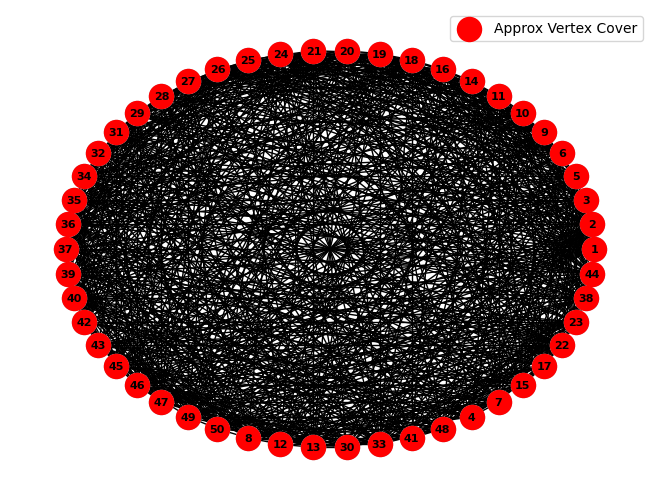

In [46]:
def min_vertex_cover_approximation(adj_matrix):
    n = len(adj_matrix)
    vertex_cover = set()
    edges = set()

    # Create a set of edges from the adjacency matrix
    for i in range(n):
        for j in range(i + 1, n):
            if adj_matrix[i][j] == 1:
                edges.add((i + 1, j + 1))  # Adding 1 to make the vertices 1-indexed

    while edges:
        # Select an arbitrary edge
        edge = next(iter(edges))

        # Add its endpoints to the vertex cover
        vertex_cover.add(edge[0])
        vertex_cover.add(edge[1])

        # Remove all edges incident on these endpoints
        edges = {(i, j) for (i, j) in edges if i not in vertex_cover and j not in vertex_cover}

    return vertex_cover

def visualize_graph_with_vertex_cover(adj_matrix, vertex_cover):
    G = nx.Graph()

    # Add edges to the graph
    for i in range(len(adj_matrix)):
        for j in range(i + 1, len(adj_matrix[i])):
            if adj_matrix[i][j] == 1:
                G.add_edge(i + 1, j + 1)  # Adding 1 to make the vertices 1-indexed

    # Draw the original graph
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', font_color='black', font_size=8)

    # Highlight vertices in the minimum vertex cover
    nx.draw_networkx_nodes(G, pos, nodelist=vertex_cover, node_color='red', label='Approx Vertex Cover')

    plt.legend()
    plt.show()

print("Minimum Vertex Cover (Approximation):", output_set)
print(output_size)

visualize_graph_with_vertex_cover(adj_matrix, output_set)
